In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('car_prices.csv')
df

,make,model,year,mileage,color,state,date,price
0,Chevrolet,Cruze,2011,99157,white,TX,02:01.6,37488
1,Toyota,Cruze,2017,19882,red,IL,02:01.6,34176
2,Chevrolet,Altima,2011,77718,blue,CA,02:01.6,40297
3,Nissan,Fusion,2012,83613,silver,TX,02:01.6,43492
4,Ford,Cruze,2016,95349,red,NY,02:01.6,26655
...,...,...,...,...,...,...,...,...
9995,Honda,Altima,2017,25154,red,FL,02:01.6,43139
9996,Chevrolet,Accord,2017,68264,white,TX,02:01.6,15632
9997,Nissan,Cruze,2016,17417,silver,IL,02:01.6,30832
9998,Honda,Accord,2011,68878,blue,TX,02:01.6,10801


In [3]:
df.shape

(10000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   make     10000 non-null  object
 1   model    10000 non-null  object
 2   year     10000 non-null  int64 
 3   mileage  10000 non-null  int64 
 4   color    10000 non-null  object
 5   state    10000 non-null  object
 6   date     10000 non-null  object
 7   price    10000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

make       0
model      0
year       0
mileage    0
color      0
state      0
date       0
price      0
dtype: int64

In [6]:
df.describe()

,year,mileage,price
count,10000.000000,10000.00000,10000.000000
mean,2013.828000,55798.05900,29376.222000
std,2.627376,25128.85138,11660.361084
min,2010.000000,10284.00000,10022.000000
25%,2011.000000,35137.50000,19071.250000
50%,2014.000000,55739.50000,29418.500000
75%,2016.000000,77193.75000,39133.500000
max,2018.000000,99783.00000,49998.000000


In [7]:
df.describe(include='O')

,make,model,color,state,date
count,10000,10000,10000,10000,10000
unique,5,5,5,5,1
top,Nissan,Cruze,silver,CA,02:01.6
freq,2240,2150,2190,2140,10000


(array([ 960.,  800.,  930., 1060., 1130., 1170., 1000.,  960., 1010.,
         980.]),
 array([10284. , 19233.9, 28183.8, 37133.7, 46083.6, 55033.5, 63983.4,
        72933.3, 81883.2, 90833.1, 99783. ]),
 <BarContainer object of 10 artists>)

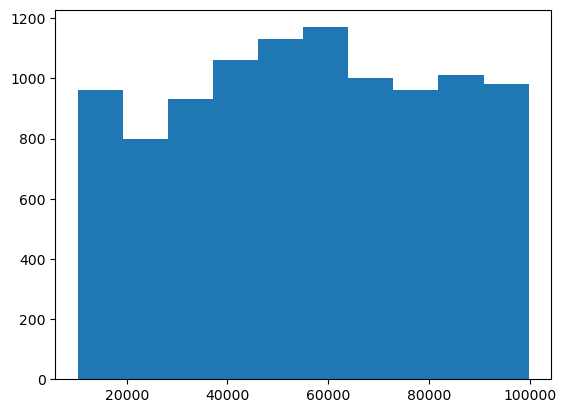

In [8]:
plt.hist(df['mileage'])

(array([1180., 1080.,  940.,  960., 1020., 1000., 1000., 1020.,  810.,
         990.]),
 array([10022. , 14019.6, 18017.2, 22014.8, 26012.4, 30010. , 34007.6,
        38005.2, 42002.8, 46000.4, 49998. ]),
 <BarContainer object of 10 artists>)

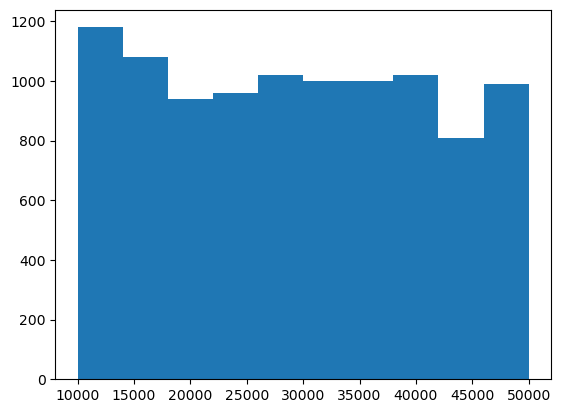

In [9]:
plt.hist(df['price'])

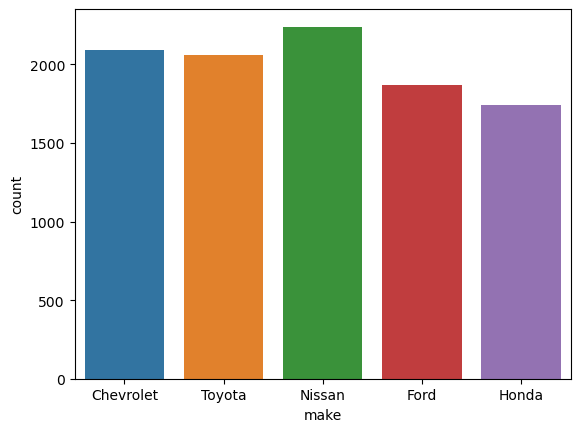

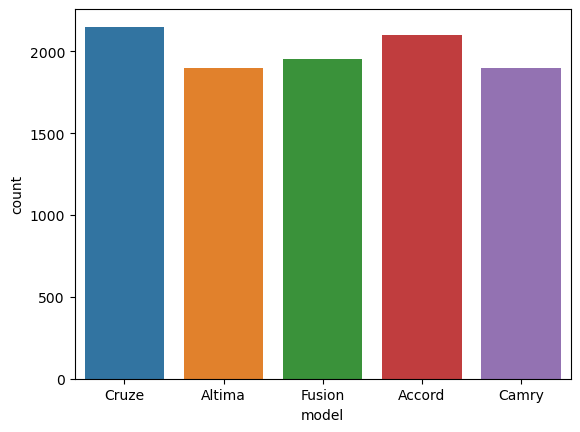

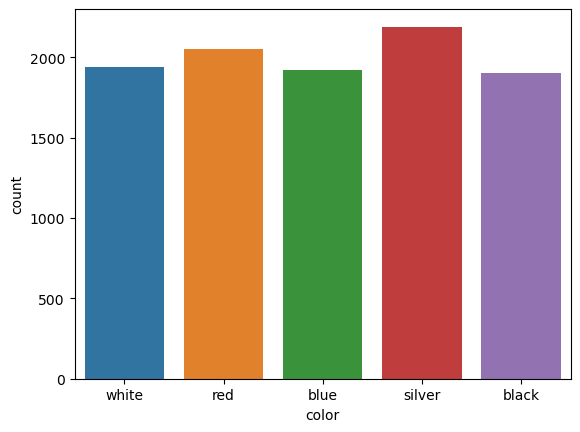

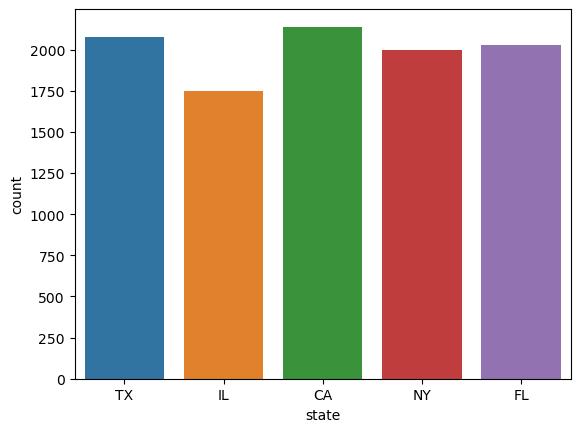

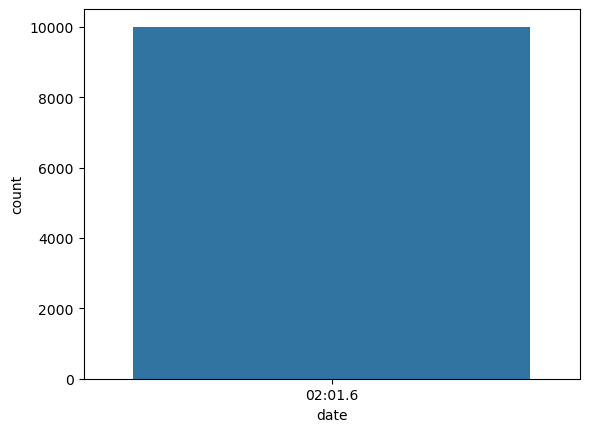

In [10]:
for i in df.columns:
  if df[i].dtype=='object':
    sns.countplot(df[i])
    plt.show()

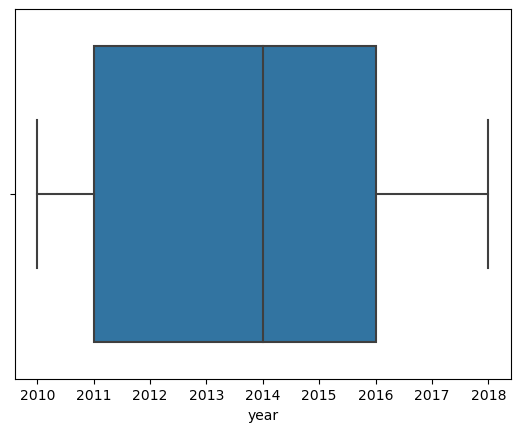

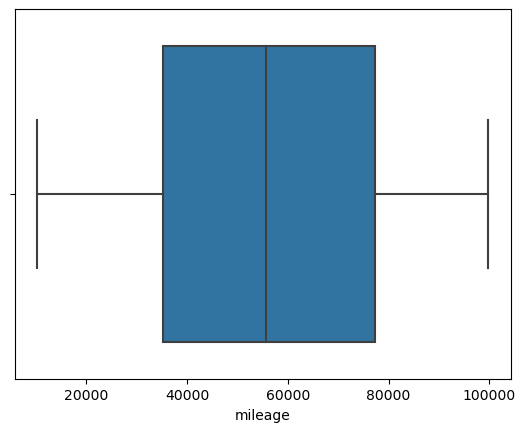

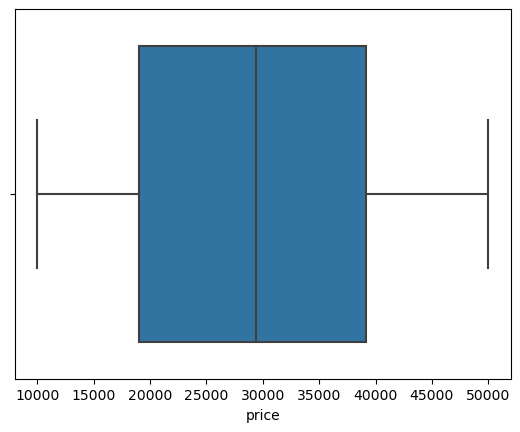

In [11]:
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.show()

In [12]:
df.drop(['date'], axis=1,inplace=True)
df.head()

,make,model,year,mileage,color,state,price
0,Chevrolet,Cruze,2011,99157,white,TX,37488
1,Toyota,Cruze,2017,19882,red,IL,34176
2,Chevrolet,Altima,2011,77718,blue,CA,40297
3,Nissan,Fusion,2012,83613,silver,TX,43492
4,Ford,Cruze,2016,95349,red,NY,26655


In [13]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,year,mileage,price,make_Ford,make_Honda,make_Nissan,make_Toyota,model_Altima,model_Camry,model_Cruze,model_Fusion,color_blue,color_red,color_silver,color_white,state_FL,state_IL,state_NY,state_TX
0,2011,99157,37488,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,2017,19882,34176,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,2011,77718,40297,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,2012,83613,43492,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,2016,95349,26655,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [14]:
X = df.drop(['price'],axis=1).values
y = df['price'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
X_train.shape, X_test.shape

((7000, 18), (3000, 18))

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
LR = LinearRegression()
RF=RandomForestRegressor()
KNN=KNeighborsRegressor()
DT=DecisionTreeRegressor()

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11638.1517
- Mean Absolute Error: 10043.6425
- R2 Score: 0.0128
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11499.2758
- Mean Absolute Error: 9895.3038
- R2 Score: 0.0048


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 96.3581
- Mean Absolute Error: 24.1153
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 180.0092
- Mean Absolute Error: 60.2237
- R2 Score: 0.9998


K Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 583.6258
- Mean Absolute Error: 72.3591
- R2 Score: 0.9975
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1182.7523
- Mean Absolute Error: 288.4660
- R2 Score: 0.9895


Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean A

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,Decision Tree Regressor,1.000000
1,Random Forest Regressor,0.999756
2,K Neighbors Regressor,0.989472
0,Linear Regression,0.004797


In [21]:
DT_model = DecisionTreeRegressor()
DT_model = DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head(15)

,Actual Value,Predicted Value,Difference
0,15820,15820.0,0.0
1,10539,10539.0,0.0
2,10247,10247.0,0.0
3,25712,25712.0,0.0
4,22564,22564.0,0.0
5,41239,41239.0,0.0
6,21604,21604.0,0.0
7,37310,37310.0,0.0
8,30488,30488.0,0.0
9,18993,18993.0,0.0
